In [48]:
# IMPORTS
from __future__ import division
import numpy as np
from numpy import random as npr
from matplotlib import pyplot as plt
from pprint import pprint

%matplotlib notebook
np.set_printoptions(precision=5)

## Exercice 1

### 1) Generate n=500 samples from a Beta distribution with parameter (α,β)=(2,5). Display the histogram of this sample with 25 bins. Then, generate n=500 independent random vectors Xi , i=1,.,n in R2, where all coordinates are drawn independently from a Beta distribution with parameter (α,β)=(2,5). Compute the mean vector (in R²).

<IPython.core.display.Javascript object>


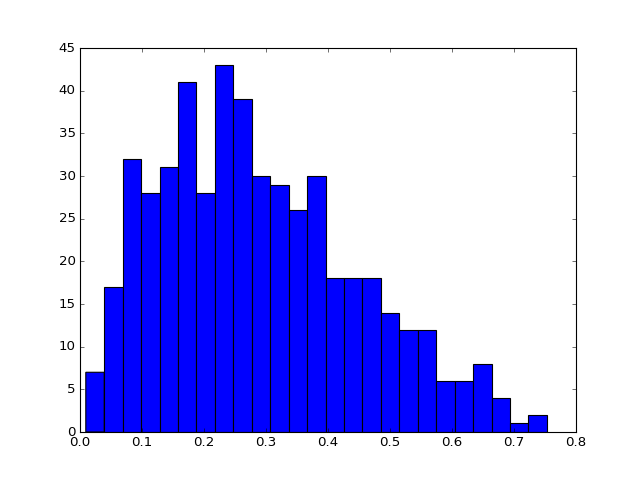

(0.27831252226382236, 0.27660944734545034)

In [50]:
(a, b) = (2, 5)
n = 500

samples = npr.beta(a, b, n)
plt.hist(samples, bins=25, label='Samples from Beta distribution')
plt.show()

beta1 = npr.beta(a, b, 500)
beta2 = npr.beta(a, b, 500)
X = [(a1, a2) for a1, a2 in zip(beta1, beta2)]

X_mean = (beta1.mean(), beta2.mean())
X_mean

### 2) Compute B=500 bootstrap estimators of the mean. On the same plot, represent the observed data, the mean and the 500 bootstrap estimators of the mean.


In [51]:
B = 500

bs_X = []
bs_X_mean = []
for _ in range(B):
    sample = []
    for i in npr.randint(0, n, n):
        sample.append(X[i])
    bs_X.append(sample)
    bs_X_mean.append(list(map(lambda x: sum(x) / len(x), zip(*sample))))

<IPython.core.display.Javascript object>


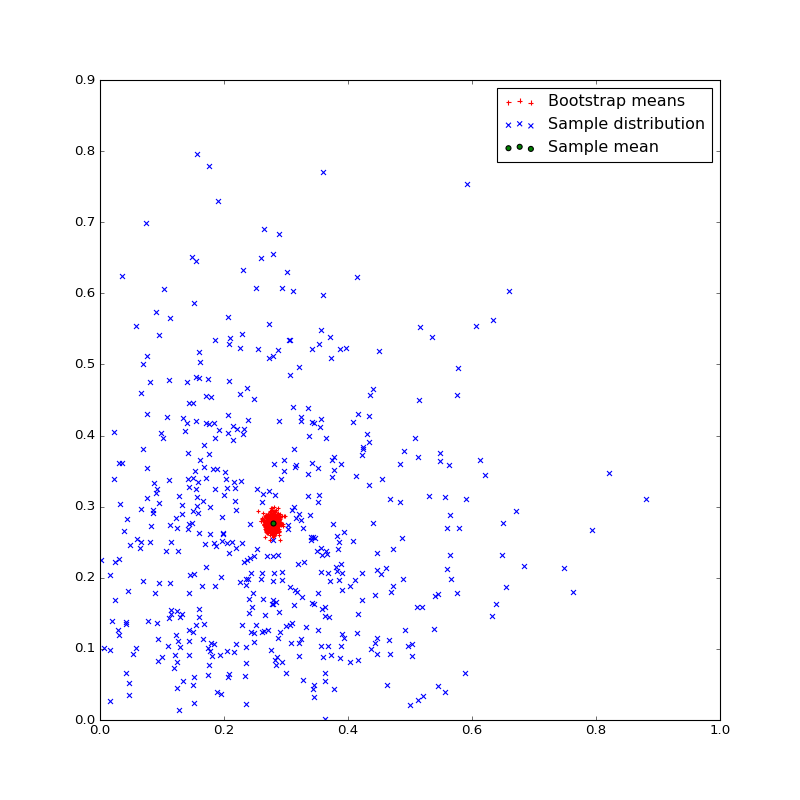

In [52]:
x = [m[0] for m in bs_X_mean]
y = [m[1] for m in bs_X_mean]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(x, y, c='r', marker='+', label='Bootstrap means')
ax.scatter(beta1, beta2, c='b', marker='x', label='Sample distribution')
ax.scatter(X_mean[0], X_mean[1], c='g', marker='o', label='Sample mean')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.legend(loc='upper right')
plt.show()


### 3) Give bootstrap estimates of the bias and the variance of the mean estimator.

In [53]:
diff = np.subtract(bs_X_mean, X_mean)
print(diff.shape)
bs_X_mean_diff = np.divide(np.sum(diff, axis=0), B)
print("Le biais de la moyenne vaut:\n", bs_bias)
print()

bs_X_mean_of_means_diff = np.subtract(bs_X_mean, [np.mean(x), np.mean(y)])

bs_X_mean_of_means_diff = np.subtract(bs_X_mean, [np.mean(x), np.mean(y)])
bs_variance = np.divide(np.dot(np.transpose(bs_X_mean_of_means_diff), bs_X_mean_of_means_diff), B)
print("La matrice de covariance de l'estimateur bootstrap de la moyenne vaut:\n", bs_variance)

(500, 2)
Le biais de la moyenne vaut:
 [ 0.00052 -0.00054]

La matrice de covariance de l'estimateur bootstrap de la moyenne vaut:
 [[  4.79049e-05   1.53449e-06]
 [  1.53449e-06   5.68194e-05]]


### 4) Give jackknife estimates of the bias and the variance of the mean estimator. Verify the formula

In [ ]:
jack_X = []